In [ ]:
#Sample Machine Learning Project
#Dataset:grapes_new.csv


In [ ]:
#Steps:
#1. Data Import
#2. Data cleaning
#3. Exploratory Data Analysis
#4. Outlier Detection
#5. Data balancing/Resamplin
#6. Feature selection/Dimensionality Reduction
#7. Feature scaling
#8. Cross validation
#9. Algorithm, Hyperparameter Tuning
#10. Model building
#11. Predictions, Performance monitoring
#12. Deployment

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving grapes_new.csv to grapes_new.csv


In [ ]:
df = pd.read_csv('grapes_new.csv')
# Dataset is now stored in a Pandas Dataframe
df

,COLOR_INTENSITY,SHAPE,RIPENESS_PER,ALCOHOL_PER,MALIC_ACID_PER,ASH,ALCALINITY_OF_ASH,MAGNESIUM_MEASURE,TOTAL_PHENOLS,FLAVANOIDS,...,HUE,PROLINE,TEMPERATURE,AVG_HUMIDITY,FERT_NITRO_PER,WATER_O2_PER,WATER_PH,FER_P2O5_PER,SOIL_TYPE,CLASS
0,120.53,elliptical,16.73,14.23,1.71,2.43,15.6,127,2.80,3.06,...,1.04,1065,23.34,54.99,31.21,97.67,7.71,52.02,archean,High
1,112.57,elliptical,20.30,13.20,1.78,2.14,11.2,100,2.65,2.76,...,1.05,1050,23.40,51.91,31.28,99.05,7.66,48.18,archean,High
2,120.78,elliptical,20.81,13.16,2.36,2.67,18.6,101,2.80,3.24,...,1.03,1185,22.29,50.69,31.92,97.95,7.66,28.15,archean,High
3,134.17,elliptical,19.47,14.37,1.95,2.50,16.8,113,3.85,3.49,...,0.86,1480,21.28,47.72,31.79,95.46,7.21,55.95,alluvial,High
4,112.19,round,17.57,13.24,2.59,2.87,21.0,118,2.80,2.69,...,1.04,735,23.76,45.09,31.86,94.45,7.80,55.99,archean,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,102.34,elliptical,21.23,12.07,2.16,2.17,21.0,85,2.60,2.65,...,0.86,378,25.58,46.15,30.14,89.52,8.49,55.83,alluvial,Medium
190,109.80,elliptical,21.67,12.43,1.53,2.29,NaN,86,2.74,3.15,...,0.69,352,24.23,52.23,30.72,85.91,7.73,55.47,archean,Medium
191,103.86,round,22.01,11.79,2.13,2.78,28.5,92,2.13,2.24,...,0.97,466,27.62,48.98,30.46,86.31,7.57,47.57,archean,Medium
192,98.30,elliptical,21.95,12.37,1.63,2.30,24.5,88,2.22,2.45,...,0.89,342,27.54,47.72,30.01,90.60,7.15,45.91,alluvial,Medium


In [ ]:
df.columns

Index(['COLOR_INTENSITY', 'SHAPE', 'RIPENESS_PER', 'ALCOHOL_PER',
       'MALIC_ACID_PER', 'ASH', 'ALCALINITY_OF_ASH', 'MAGNESIUM_MEASURE',
       'TOTAL_PHENOLS', 'FLAVANOIDS', 'PROANTHOCYANINS', 'HUE', 'PROLINE',
       'TEMPERATURE', 'AVG_HUMIDITY', 'FERT_NITRO_PER', 'WATER_O2_PER',
       'WATER_PH', 'FER_P2O5_PER', 'SOIL_TYPE', 'CLASS'],
      dtype='object')

In [ ]:
#Separate input output data
x=df.drop('CLASS',axis=1)
y=df['CLASS']

In [ ]:
x.shape

(194, 20)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   COLOR_INTENSITY    194 non-null    float64
 1   SHAPE              194 non-null    object 
 2   RIPENESS_PER       192 non-null    float64
 3   ALCOHOL_PER        191 non-null    float64
 4   MALIC_ACID_PER     194 non-null    float64
 5   ASH                194 non-null    float64
 6   ALCALINITY_OF_ASH  188 non-null    float64
 7   MAGNESIUM_MEASURE  194 non-null    int64  
 8   TOTAL_PHENOLS      194 non-null    float64
 9   FLAVANOIDS         194 non-null    float64
 10  PROANTHOCYANINS    194 non-null    float64
 11  HUE                192 non-null    float64
 12  PROLINE            194 non-null    int64  
 13  TEMPERATURE        194 non-null    float64
 14  AVG_HUMIDITY       194 non-null    float64
 15  FERT_NITRO_PER     194 non-null    float64
 16  WATER_O2_PER       190 non

In [ ]:
#Multi class classification
y.value_counts()

Medium    76
High      64
Low       54
Name: CLASS, dtype: int64

In [ ]:
#2. Data cleaning-Missing values
x.isnull().sum()

COLOR_INTENSITY      0
SHAPE                0
RIPENESS_PER         2
ALCOHOL_PER          3
MALIC_ACID_PER       0
ASH                  0
ALCALINITY_OF_ASH    6
MAGNESIUM_MEASURE    0
TOTAL_PHENOLS        0
FLAVANOIDS           0
PROANTHOCYANINS      0
HUE                  2
PROLINE              0
TEMPERATURE          0
AVG_HUMIDITY         0
FERT_NITRO_PER       0
WATER_O2_PER         4
WATER_PH             0
FER_P2O5_PER         0
SOIL_TYPE            0
dtype: int64

In [ ]:
x.fillna(method='backfill',inplace=True)
x.fillna(method='pad',inplace=True)

In [ ]:
x.isnull().sum()

COLOR_INTENSITY      0
SHAPE                0
RIPENESS_PER         0
ALCOHOL_PER          0
MALIC_ACID_PER       0
ASH                  0
ALCALINITY_OF_ASH    0
MAGNESIUM_MEASURE    0
TOTAL_PHENOLS        0
FLAVANOIDS           0
PROANTHOCYANINS      0
HUE                  0
PROLINE              0
TEMPERATURE          0
AVG_HUMIDITY         0
FERT_NITRO_PER       0
WATER_O2_PER         0
WATER_PH             0
FER_P2O5_PER         0
SOIL_TYPE            0
dtype: int64

In [ ]:
#3. Exploratory data analysis
x.describe()

,COLOR_INTENSITY,RIPENESS_PER,ALCOHOL_PER,MALIC_ACID_PER,ASH,ALCALINITY_OF_ASH,MAGNESIUM_MEASURE,TOTAL_PHENOLS,FLAVANOIDS,PROANTHOCYANINS,HUE,PROLINE,TEMPERATURE,AVG_HUMIDITY,FERT_NITRO_PER,WATER_O2_PER,WATER_PH,FER_P2O5_PER
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,116.882113,21.525155,13.031031,2.335103,2.365361,19.530928,99.680412,2.296649,2.016856,1.577216,0.956505,754.164948,26.418247,50.976082,30.562216,90.374742,7.680979,42.195155
std,14.333204,2.377363,0.808171,1.118041,0.268158,3.498908,14.252749,0.634317,1.001351,0.565445,0.227603,316.093797,3.042364,3.367880,1.126867,5.479561,0.509935,10.398205
min,93.000000,16.170000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.410000,0.480000,278.000000,21.020000,44.230000,27.670000,80.360000,6.510000,20.000000
25%,105.470000,20.372500,12.370000,1.610000,2.210000,17.025000,88.000000,1.725000,1.092500,1.225000,0.790000,504.000000,24.222500,48.360000,29.932500,85.862500,7.252500,33.742500
50%,114.910000,21.820000,13.050000,1.865000,2.360000,19.500000,97.500000,2.355000,2.135000,1.545000,0.975000,675.000000,26.195000,51.145000,30.710000,90.550000,7.670000,44.820000
75%,124.060000,23.317500,13.705000,3.082500,2.547500,21.500000,107.000000,2.800000,2.875000,1.950000,1.117500,988.750000,28.737500,53.722500,31.382500,94.897500,8.127500,50.542500
max,167.000000,25.200000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,3.580000,1.710000,1680.000000,32.340000,57.950000,34.160000,99.770000,8.500000,60.870000


In [ ]:
#Label Encode
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['SHAPE']=le.fit_transform(x['SHAPE'])
x['SOIL_TYPE']=le.fit_transform(x['SOIL_TYPE'])


In [ ]:
x.describe()

,COLOR_INTENSITY,SHAPE,RIPENESS_PER,ALCOHOL_PER,MALIC_ACID_PER,ASH,ALCALINITY_OF_ASH,MAGNESIUM_MEASURE,TOTAL_PHENOLS,FLAVANOIDS,PROANTHOCYANINS,HUE,PROLINE,TEMPERATURE,AVG_HUMIDITY,FERT_NITRO_PER,WATER_O2_PER,WATER_PH,FER_P2O5_PER,SOIL_TYPE
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,116.882113,0.365979,21.525155,13.031031,2.335103,2.365361,19.530928,99.680412,2.296649,2.016856,1.577216,0.956505,754.164948,26.418247,50.976082,30.562216,90.374742,7.680979,42.195155,0.536082
std,14.333204,0.482950,2.377363,0.808171,1.118041,0.268158,3.498908,14.252749,0.634317,1.001351,0.565445,0.227603,316.093797,3.042364,3.367880,1.126867,5.479561,0.509935,10.398205,0.499987
min,93.000000,0.000000,16.170000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.410000,0.480000,278.000000,21.020000,44.230000,27.670000,80.360000,6.510000,20.000000,0.000000
25%,105.470000,0.000000,20.372500,12.370000,1.610000,2.210000,17.025000,88.000000,1.725000,1.092500,1.225000,0.790000,504.000000,24.222500,48.360000,29.932500,85.862500,7.252500,33.742500,0.000000
50%,114.910000,0.000000,21.820000,13.050000,1.865000,2.360000,19.500000,97.500000,2.355000,2.135000,1.545000,0.975000,675.000000,26.195000,51.145000,30.710000,90.550000,7.670000,44.820000,1.000000
75%,124.060000,1.000000,23.317500,13.705000,3.082500,2.547500,21.500000,107.000000,2.800000,2.875000,1.950000,1.117500,988.750000,28.737500,53.722500,31.382500,94.897500,8.127500,50.542500,1.000000
max,167.000000,1.000000,25.200000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,3.580000,1.710000,1680.000000,32.340000,57.950000,34.160000,99.770000,8.500000,60.870000,1.000000


<Axes: xlabel='COLOR_INTENSITY', ylabel='Density'>

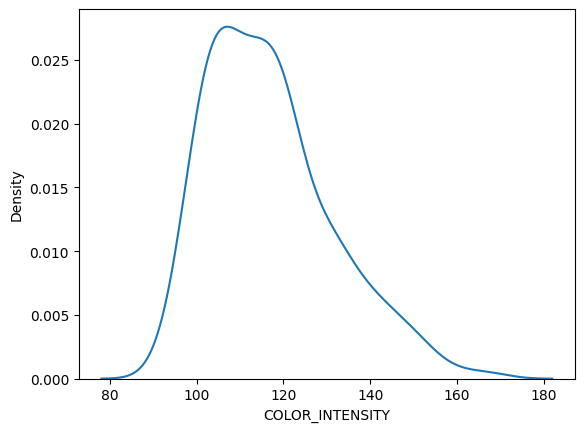

In [ ]:
sns.kdeplot(df['COLOR_INTENSITY'])

In [ ]:
#if mean and median for data is almost same then data is normally distributed


In [ ]:
temp=df[['COLOR_INTENSITY','RIPENESS_PER','ALCOHOL_PER','FLAVANOIDS','FERT_NITRO_PER','CLASS']]

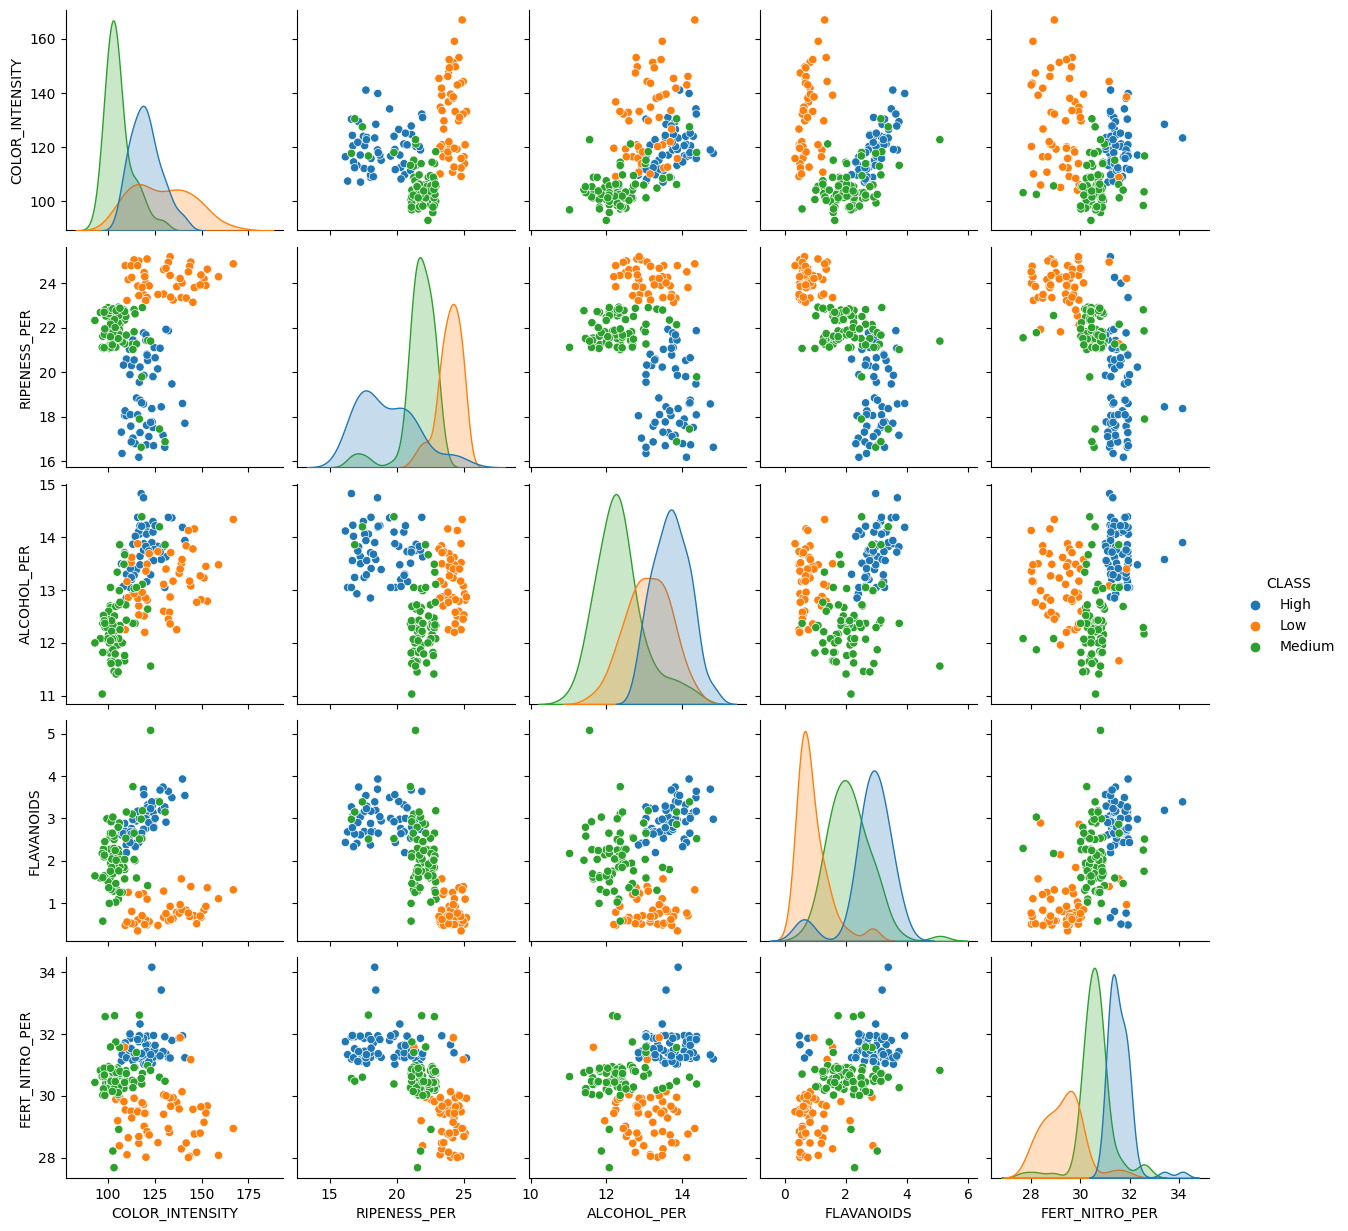

In [ ]:
sns.pairplot(temp,hue='CLASS',palette='tab10')

In [ ]:
#6. Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
skf = SelectKBest(score_func = chi2, k=5)

In [ ]:
x_new=skf.fit_transform(x,y)

In [ ]:
x_new.shape

(194, 5)

In [ ]:
skf.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
        True, False])

In [ ]:
x_new=x.iloc[:,skf.get_support()]

In [ ]:
x_new

,COLOR_INTENSITY,PROLINE,TEMPERATURE,WATER_O2_PER,FER_P2O5_PER
0,120.53,1065,23.34,97.67,52.02
1,112.57,1050,23.40,99.05,48.18
2,120.78,1185,22.29,97.95,28.15
3,134.17,1480,21.28,95.46,55.95
4,112.19,735,23.76,94.45,55.99
...,...,...,...,...,...
189,102.34,378,25.58,89.52,55.83
190,109.80,352,24.23,85.91,55.47
191,103.86,466,27.62,86.31,47.57
192,98.30,342,27.54,90.60,45.91


In [ ]:
#6. Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x_new)

In [ ]:
pd.DataFrame(x_scaled,columns=x_new.columns).describe()

,COLOR_INTENSITY,PROLINE,TEMPERATURE,WATER_O2_PER,FER_P2O5_PER
count,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.322731,0.339633,0.476877,0.515958,0.543067
std,0.193692,0.225459,0.268760,0.282306,0.254421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.168514,0.161198,0.282906,0.283488,0.336249
50%,0.296081,0.283167,0.457155,0.524987,0.607291
75%,0.419730,0.506954,0.681758,0.748970,0.747309
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#8. Cross Validation
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(
    x_scaled,y,random_state=0)

In [ ]:
x_train.shape

(145, 5)

In [ ]:
x_test.shape

(49, 5)

In [ ]:
# 9. Algorithm, Hyperparameter Tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV




In [ ]:
params={
    'random_state':[0,1,2,3,4,5],
    'criterion':['gini','entropy'],
    'splitter':['best','random']
}

In [ ]:
dt=DecisionTreeClassifier()


In [ ]:
grid=GridSearchCV(dt,param_grid=params,cv=5,scoring='accuracy')

In [ ]:
grid.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'random_state': [0, 1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
y_pred =grid.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9387755102040817

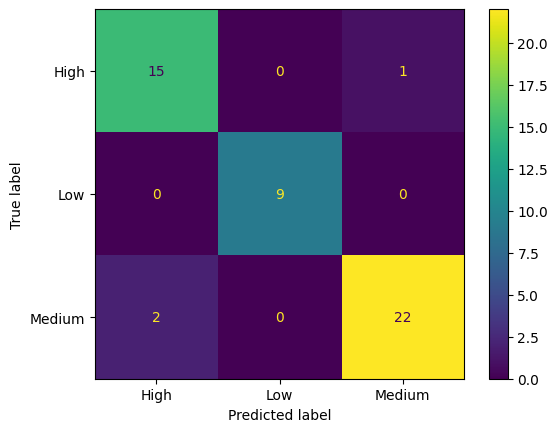

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
#12. Deployment
#Serilization
import joblib
